In [1]:
import pandas as pd

# 读取数据集
file_path = '3_buy.csv'
data = pd.read_csv(file_path)

# 显示数据的基本信息和前几行
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   review    14 non-null     int64
 1   discount  14 non-null     int64
 2   needed    14 non-null     int64
 3   shipping  14 non-null     int64
 4   buy       14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


,review,discount,needed,shipping,buy
0,3,3,0,1,1
1,3,3,0,0,1
2,2,3,0,1,0
3,1,2,0,1,0
4,1,1,1,1,0


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 准备数据
X = data.drop('buy', axis=1)  # 特征
y = data['buy']  # 目标变量

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ID3 模型（使用entropy作为criterion）
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)

# CART 模型（使用gini作为criterion）
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_model.fit(X_train, y_train)

# 模型预测
id3_predictions = id3_model.predict(X_test)
cart_predictions = cart_model.predict(X_test)

# 评估模型
id3_report = classification_report(y_test, id3_predictions)
cart_report = classification_report(y_test, cart_predictions)

id3_accuracy = accuracy_score(y_test, id3_predictions)
cart_accuracy = accuracy_score(y_test, cart_predictions)

print('id3 报告：\n', id3_report, '\nid3 准确率：', id3_accuracy, '\nCART 报告：\n', cart_report, '\nCART 准确率：', cart_accuracy)


id3 报告：
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5
 
id3 准确率： 0.8 
CART 报告：
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5
 
CART 准确率： 0.8


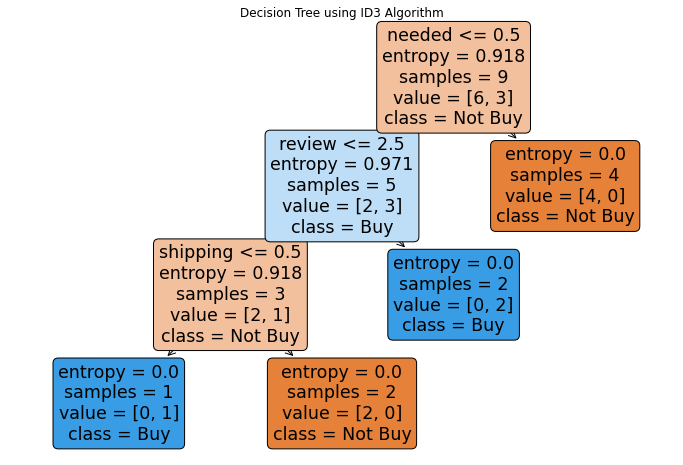

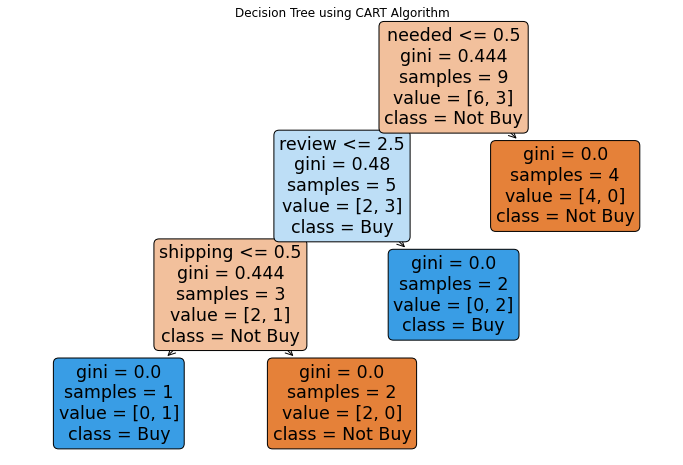

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 可视化ID3模型
plt.figure(figsize=(12, 8))
plot_tree(id3_model, filled=True, feature_names=X.columns, class_names=['Not Buy', 'Buy'], rounded=True)
plt.title("Decision Tree using ID3 Algorithm")
plt.show()

# 可视化CART模型
plt.figure(figsize=(12, 8))
plot_tree(cart_model, filled=True, feature_names=X.columns, class_names=['Not Buy', 'Buy'], rounded=True)
plt.title("Decision Tree using CART Algorithm")
plt.show()
